# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 9180 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (   1 of 9180) |             | Elapsed Time: 0:00:32 ETA:  3 days, 11:32:06

  0% (  56 of 9180) |                      | Elapsed Time: 0:00:33 ETA:  0:02:13

  1% ( 115 of 9180) |                      | Elapsed Time: 0:00:34 ETA:  0:02:14

  1% ( 166 of 9180) |                      | Elapsed Time: 0:00:35 ETA:  0:02:17

  2% ( 219 of 9180) |                      | Elapsed Time: 0:00:36 ETA:  0:02:17

  2% ( 230 of 9180) |                      | Elapsed Time: 0:00:37 ETA:  0:02:17

  3% ( 283 of 9180) |                      | Elapsed Time: 0:00:38 ETA:  0:02:16

  3% ( 345 of 9180) |                      | Elapsed Time: 0:00:39 ETA:  0:02:16

  4% ( 399 of 9180) |                      | Elapsed Time: 0:00:40 ETA:  0:02:16

  5% ( 459 of 9180) |#                     | Elapsed Time: 0:00:41 ETA:  0:02:14

  5% ( 509 of 9180) |#                     | Elapsed Time: 0:00:42 ETA:  0:02:14

  6% ( 574 of 9180) |#                     | Elapsed Time: 0:00:43 ETA:  0:02:09

  6% ( 625 of 9180) |#                     | Elapsed Time: 0:00:44 ETA:  0:02:09

  7% ( 674 of 9180) |#                     | Elapsed Time: 0:00:45 ETA:  0:02:10

  7% ( 689 of 9180) |#                     | Elapsed Time: 0:00:45 ETA:  0:02:10

  8% ( 746 of 9180) |#                     | Elapsed Time: 0:00:46 ETA:  0:02:08

  8% ( 804 of 9180) |#                     | Elapsed Time: 0:00:48 ETA:  0:02:07

  9% ( 849 of 9180) |##                    | Elapsed Time: 0:00:49 ETA:  0:02:09

  9% ( 895 of 9180) |##                    | Elapsed Time: 0:00:50 ETA:  0:02:15

 10% ( 918 of 9180) |##                    | Elapsed Time: 0:00:50 ETA:  0:02:14

 10% ( 969 of 9180) |##                    | Elapsed Time: 0:00:51 ETA:  0:02:13

 11% (1018 of 9180) |##                    | Elapsed Time: 0:00:52 ETA:  0:02:11

 11% (1033 of 9180) |##                    | Elapsed Time: 0:00:52 ETA:  0:02:11

 11% (1080 of 9180) |##                    | Elapsed Time: 0:00:53 ETA:  0:02:16

 12% (1125 of 9180) |##                    | Elapsed Time: 0:00:54 ETA:  0:02:20

 12% (1148 of 9180) |##                    | Elapsed Time: 0:00:55 ETA:  0:02:22

 12% (1193 of 9180) |##                    | Elapsed Time: 0:00:56 ETA:  0:02:21

 13% (1244 of 9180) |##                    | Elapsed Time: 0:00:57 ETA:  0:02:17

 13% (1263 of 9180) |###                   | Elapsed Time: 0:00:57 ETA:  0:02:18

 14% (1308 of 9180) |###                   | Elapsed Time: 0:00:58 ETA:  0:02:21

 14% (1357 of 9180) |###                   | Elapsed Time: 0:00:59 ETA:  0:02:20

 15% (1377 of 9180) |###                   | Elapsed Time: 0:01:00 ETA:  0:02:17

 15% (1425 of 9180) |###                   | Elapsed Time: 0:01:01 ETA:  0:02:15

 15% (1467 of 9180) |###                   | Elapsed Time: 0:01:02 ETA:  0:02:16

 16% (1492 of 9180) |###                   | Elapsed Time: 0:01:02 ETA:  0:02:14

 16% (1529 of 9180) |###                   | Elapsed Time: 0:01:03 ETA:  0:02:18

 17% (1579 of 9180) |###                   | Elapsed Time: 0:01:04 ETA:  0:02:18

 17% (1607 of 9180) |###                   | Elapsed Time: 0:01:05 ETA:  0:02:16

 18% (1659 of 9180) |###                   | Elapsed Time: 0:01:06 ETA:  0:02:11

 18% (1704 of 9180) |####                  | Elapsed Time: 0:01:07 ETA:  0:02:12

 18% (1722 of 9180) |####                  | Elapsed Time: 0:01:07 ETA:  0:02:15

 19% (1746 of 9180) |####                  | Elapsed Time: 0:01:09 ETA:  0:02:50

 19% (1795 of 9180) |####                  | Elapsed Time: 0:01:10 ETA:  0:02:43

 20% (1836 of 9180) |####                  | Elapsed Time: 0:01:11 ETA:  0:02:41

 20% (1888 of 9180) |####                  | Elapsed Time: 0:01:12 ETA:  0:02:30

 21% (1940 of 9180) |####                  | Elapsed Time: 0:01:13 ETA:  0:02:28

 21% (1951 of 9180) |####                  | Elapsed Time: 0:01:13 ETA:  0:02:29

 21% (1998 of 9180) |####                  | Elapsed Time: 0:01:14 ETA:  0:02:31

 22% (2048 of 9180) |####                  | Elapsed Time: 0:01:15 ETA:  0:02:27

 22% (2066 of 9180) |####                  | Elapsed Time: 0:01:16 ETA:  0:02:25

 23% (2113 of 9180) |#####                 | Elapsed Time: 0:01:17 ETA:  0:01:51

 23% (2156 of 9180) |#####                 | Elapsed Time: 0:01:18 ETA:  0:01:53

 23% (2181 of 9180) |#####                 | Elapsed Time: 0:01:18 ETA:  0:01:52

 24% (2220 of 9180) |#####                 | Elapsed Time: 0:01:19 ETA:  0:01:58

 24% (2267 of 9180) |#####                 | Elapsed Time: 0:01:20 ETA:  0:02:00

 25% (2295 of 9180) |#####                 | Elapsed Time: 0:01:21 ETA:  0:01:59

 25% (2346 of 9180) |#####                 | Elapsed Time: 0:01:22 ETA:  0:01:56

 25% (2384 of 9180) |#####                 | Elapsed Time: 0:01:23 ETA:  0:02:02

 26% (2410 of 9180) |#####                 | Elapsed Time: 0:01:23 ETA:  0:02:00

 26% (2451 of 9180) |#####                 | Elapsed Time: 0:01:24 ETA:  0:02:02

 27% (2491 of 9180) |#####                 | Elapsed Time: 0:01:25 ETA:  0:02:03

 27% (2525 of 9180) |######                | Elapsed Time: 0:01:26 ETA:  0:02:04

 28% (2571 of 9180) |######                | Elapsed Time: 0:01:27 ETA:  0:01:59

 28% (2610 of 9180) |######                | Elapsed Time: 0:01:28 ETA:  0:02:03

 28% (2640 of 9180) |######                | Elapsed Time: 0:01:29 ETA:  0:02:07

 29% (2688 of 9180) |######                | Elapsed Time: 0:01:30 ETA:  0:02:08

 29% (2731 of 9180) |######                | Elapsed Time: 0:01:31 ETA:  0:02:04

 30% (2754 of 9180) |######                | Elapsed Time: 0:01:32 ETA:  0:02:06

 30% (2795 of 9180) |######                | Elapsed Time: 0:01:33 ETA:  0:02:05

 30% (2832 of 9180) |######                | Elapsed Time: 0:01:34 ETA:  0:02:06

 31% (2869 of 9180) |######                | Elapsed Time: 0:01:34 ETA:  0:01:58

 31% (2930 of 9180) |#######               | Elapsed Time: 0:01:35 ETA:  0:01:47

 32% (2984 of 9180) |#######               | Elapsed Time: 0:01:36 ETA:  0:01:38

 33% (3042 of 9180) |#######               | Elapsed Time: 0:01:37 ETA:  0:01:28

 33% (3099 of 9180) |#######               | Elapsed Time: 0:01:38 ETA:  0:01:22

 34% (3163 of 9180) |#######               | Elapsed Time: 0:01:39 ETA:  0:01:12

 35% (3213 of 9180) |#######               | Elapsed Time: 0:01:40 ETA:  0:01:10

 35% (3261 of 9180) |#######               | Elapsed Time: 0:01:41 ETA:  0:01:07

 36% (3316 of 9180) |#######               | Elapsed Time: 0:01:42 ETA:  0:00:59

 36% (3328 of 9180) |#######               | Elapsed Time: 0:01:42 ETA:  0:01:01

 36% (3379 of 9180) |########              | Elapsed Time: 0:01:43 ETA:  0:01:04

 37% (3426 of 9180) |########              | Elapsed Time: 0:01:44 ETA:  0:01:05

 37% (3443 of 9180) |########              | Elapsed Time: 0:01:45 ETA:  0:01:09

 38% (3489 of 9180) |########              | Elapsed Time: 0:01:46 ETA:  0:01:14

 38% (3533 of 9180) |########              | Elapsed Time: 0:01:47 ETA:  0:01:23

 38% (3558 of 9180) |########              | Elapsed Time: 0:01:48 ETA:  0:01:30

 39% (3594 of 9180) |########              | Elapsed Time: 0:01:49 ETA:  0:01:36

 39% (3630 of 9180) |########              | Elapsed Time: 0:01:50 ETA:  0:01:48

 40% (3672 of 9180) |########              | Elapsed Time: 0:01:51 ETA:  0:01:47

 40% (3731 of 9180) |########              | Elapsed Time: 0:01:52 ETA:  0:01:42

 41% (3787 of 9180) |#########             | Elapsed Time: 0:01:53 ETA:  0:01:36

 41% (3850 of 9180) |#########             | Elapsed Time: 0:01:54 ETA:  0:01:25

 42% (3902 of 9180) |#########             | Elapsed Time: 0:01:55 ETA:  0:01:17

 42% (3947 of 9180) |#########             | Elapsed Time: 0:01:56 ETA:  0:01:11

 43% (3990 of 9180) |#########             | Elapsed Time: 0:01:57 ETA:  0:01:06

 43% (4017 of 9180) |#########             | Elapsed Time: 0:01:57 ETA:  0:01:01

 44% (4072 of 9180) |#########             | Elapsed Time: 0:01:58 ETA:  0:01:02

 44% (4121 of 9180) |#########             | Elapsed Time: 0:01:59 ETA:  0:01:02

 45% (4131 of 9180) |#########             | Elapsed Time: 0:02:00 ETA:  0:01:03

 45% (4184 of 9180) |##########            | Elapsed Time: 0:02:01 ETA:  0:01:07

 46% (4246 of 9180) |##########            | Elapsed Time: 0:02:02 ETA:  0:01:00

 46% (4295 of 9180) |##########            | Elapsed Time: 0:02:03 ETA:  0:00:57

 47% (4349 of 9180) |##########            | Elapsed Time: 0:02:04 ETA:  0:00:50

 47% (4361 of 9180) |##########            | Elapsed Time: 0:02:04 ETA:  0:00:50

 48% (4417 of 9180) |##########            | Elapsed Time: 0:02:05 ETA:  0:00:49

 48% (4476 of 9180) |##########            | Elapsed Time: 0:02:06 ETA:  0:00:45

 49% (4523 of 9180) |##########            | Elapsed Time: 0:02:07 ETA:  0:00:47

 49% (4576 of 9180) |##########            | Elapsed Time: 0:02:08 ETA:  0:00:49

 50% (4590 of 9180) |###########           | Elapsed Time: 0:02:08 ETA:  0:00:48

 50% (4641 of 9180) |###########           | Elapsed Time: 0:02:09 ETA:  0:00:46

 51% (4705 of 9180) |###########           | Elapsed Time: 0:02:11 ETA:  0:00:44

 51% (4761 of 9180) |###########           | Elapsed Time: 0:02:12 ETA:  0:00:44

 52% (4820 of 9180) |###########           | Elapsed Time: 0:02:13 ETA:  0:00:40

 53% (4875 of 9180) |###########           | Elapsed Time: 0:02:14 ETA:  0:00:35

 53% (4935 of 9180) |###########           | Elapsed Time: 0:02:15 ETA:  0:00:32

 54% (4969 of 9180) |###########           | Elapsed Time: 0:02:17 ETA:  0:01:07

 54% (5021 of 9180) |############          | Elapsed Time: 0:02:18 ETA:  0:01:07

 55% (5049 of 9180) |############          | Elapsed Time: 0:02:18 ETA:  0:01:06

 55% (5101 of 9180) |############          | Elapsed Time: 0:02:19 ETA:  0:01:07

 56% (5148 of 9180) |############          | Elapsed Time: 0:02:20 ETA:  0:01:12

 56% (5164 of 9180) |############          | Elapsed Time: 0:02:21 ETA:  0:01:15

 56% (5211 of 9180) |############          | Elapsed Time: 0:02:22 ETA:  0:01:19

 57% (5252 of 9180) |############          | Elapsed Time: 0:02:23 ETA:  0:01:30

 57% (5279 of 9180) |############          | Elapsed Time: 0:02:23 ETA:  0:01:30

 57% (5317 of 9180) |############          | Elapsed Time: 0:02:24 ETA:  0:00:59

 58% (5358 of 9180) |############          | Elapsed Time: 0:02:25 ETA:  0:01:05

 58% (5394 of 9180) |############          | Elapsed Time: 0:02:26 ETA:  0:01:11

 59% (5441 of 9180) |#############         | Elapsed Time: 0:02:27 ETA:  0:01:13

 59% (5479 of 9180) |#############         | Elapsed Time: 0:02:28 ETA:  0:01:18

 60% (5508 of 9180) |#############         | Elapsed Time: 0:02:29 ETA:  0:01:17

 60% (5555 of 9180) |#############         | Elapsed Time: 0:02:30 ETA:  0:01:16

 61% (5602 of 9180) |#############         | Elapsed Time: 0:02:31 ETA:  0:01:12

 61% (5623 of 9180) |#############         | Elapsed Time: 0:02:32 ETA:  0:01:11

 61% (5669 of 9180) |#############         | Elapsed Time: 0:02:33 ETA:  0:01:04

 62% (5719 of 9180) |#############         | Elapsed Time: 0:02:34 ETA:  0:00:58

 62% (5738 of 9180) |#############         | Elapsed Time: 0:02:34 ETA:  0:00:52

 63% (5793 of 9180) |#############         | Elapsed Time: 0:02:35 ETA:  0:00:46

 63% (5837 of 9180) |#############         | Elapsed Time: 0:02:36 ETA:  0:00:42

 63% (5853 of 9180) |##############        | Elapsed Time: 0:02:37 ETA:  0:00:40

 64% (5905 of 9180) |##############        | Elapsed Time: 0:02:38 ETA:  0:00:36

 64% (5952 of 9180) |##############        | Elapsed Time: 0:02:39 ETA:  0:00:35

 65% (5967 of 9180) |##############        | Elapsed Time: 0:02:39 ETA:  0:00:34

 65% (6011 of 9180) |##############        | Elapsed Time: 0:02:40 ETA:  0:00:34

 66% (6060 of 9180) |##############        | Elapsed Time: 0:02:41 ETA:  0:00:33

 66% (6082 of 9180) |##############        | Elapsed Time: 0:02:41 ETA:  0:00:31

 66% (6133 of 9180) |##############        | Elapsed Time: 0:02:42 ETA:  0:00:32

 67% (6197 of 9180) |##############        | Elapsed Time: 0:02:44 ETA:  0:00:21

 68% (6246 of 9180) |##############        | Elapsed Time: 0:02:45 ETA:  0:00:22

 68% (6297 of 9180) |###############       | Elapsed Time: 0:02:46 ETA:  0:00:19

 68% (6312 of 9180) |###############       | Elapsed Time: 0:02:46 ETA:  0:00:17

 69% (6368 of 9180) |###############       | Elapsed Time: 0:02:47 ETA:  0:00:10

 69% (6417 of 9180) |###############       | Elapsed Time: 0:02:48 ETA:  0:00:09

 70% (6426 of 9180) |###############       | Elapsed Time: 0:02:48 ETA:  0:00:11

 70% (6472 of 9180) |###############       | Elapsed Time: 0:02:49 ETA:  0:00:13

 70% (6514 of 9180) |###############       | Elapsed Time: 0:02:50 ETA:  0:00:19

 71% (6541 of 9180) |###############       | Elapsed Time: 0:02:51 ETA:  0:00:20

 71% (6591 of 9180) |###############       | Elapsed Time: 0:02:52 ETA:  0:00:18

 72% (6638 of 9180) |###############       | Elapsed Time: 0:02:53 ETA:  0:00:19

 72% (6656 of 9180) |###############       | Elapsed Time: 0:02:53 ETA:  0:00:17

 73% (6702 of 9180) |################      | Elapsed Time: 0:02:54 ETA:  0:00:22

 73% (6755 of 9180) |################      | Elapsed Time: 0:02:55 ETA:  0:00:18

 73% (6771 of 9180) |################      | Elapsed Time: 0:02:55 ETA:  0:00:16

 74% (6820 of 9180) |################      | Elapsed Time: 0:02:56 ETA:  0:00:13

 74% (6871 of 9180) |################      | Elapsed Time: 0:02:57 ETA:  0:00:07

 75% (6885 of 9180) |################      | Elapsed Time: 0:02:58 ETA:  0:00:07

 75% (6928 of 9180) |################      | Elapsed Time: 0:02:59 ETA:  0:00:10

 76% (6984 of 9180) |################      | Elapsed Time: 0:03:00 ETA:  0:00:04

 76% (7000 of 9180) |################      | Elapsed Time: 0:03:00 ETA:  0:00:05

 76% (7054 of 9180) |################      | Elapsed Time: 0:03:01 ETA:  0:00:00

 77% (7115 of 9180) |#################     | Elapsed Time: 0:03:02 ETA:  0:00:00

 78% (7161 of 9180) |#################     | Elapsed Time: 0:03:03 ETA:  0:00:00

 78% (7201 of 9180) |#################     | Elapsed Time: 0:03:04 ETA:  0:00:04

 78% (7230 of 9180) |#################     | Elapsed Time: 0:03:05 ETA:  0:00:02

 79% (7274 of 9180) |#################     | Elapsed Time: 0:03:06 ETA:  0:00:01

 79% (7319 of 9180) |#################     | Elapsed Time: 0:03:07 ETA:  0:00:06

 80% (7344 of 9180) |#################     | Elapsed Time: 0:03:07 ETA:  0:00:07

 80% (7394 of 9180) |#################     | Elapsed Time: 0:03:08 ETA:  0:00:08

 81% (7447 of 9180) |#################     | Elapsed Time: 0:03:09 ETA:  0:00:09

 81% (7459 of 9180) |#################     | Elapsed Time: 0:03:10 ETA:  0:00:08

 81% (7506 of 9180) |#################     | Elapsed Time: 0:03:11 ETA:  0:00:06

 82% (7557 of 9180) |##################    | Elapsed Time: 0:03:12 ETA:  0:00:00

 82% (7574 of 9180) |##################    | Elapsed Time: 0:03:12 ETA:  0:00:00

 83% (7621 of 9180) |##################    | Elapsed Time: 0:03:13 ETA:  0:00:00

 83% (7663 of 9180) |##################    | Elapsed Time: 0:03:14 ETA:  0:00:00

 83% (7689 of 9180) |##################    | Elapsed Time: 0:03:15 ETA:  0:00:00

 84% (7743 of 9180) |##################    | Elapsed Time: 0:03:16 ETA:  0:00:00

 85% (7803 of 9180) |##################    | Elapsed Time: 0:03:17 ETA:  0:00:00

 85% (7859 of 9180) |##################    | Elapsed Time: 0:03:18 ETA:  0:00:00

 86% (7918 of 9180) |##################    | Elapsed Time: 0:03:19 ETA:  0:00:00

 86% (7976 of 9180) |###################   | Elapsed Time: 0:03:20 ETA:  0:00:00

 87% (8033 of 9180) |###################   | Elapsed Time: 0:03:21 ETA:  0:00:00

 88% (8079 of 9180) |###################   | Elapsed Time: 0:03:22 ETA:  0:00:00

 88% (8122 of 9180) |###################   | Elapsed Time: 0:03:23 ETA:  0:00:00

 88% (8148 of 9180) |###################   | Elapsed Time: 0:03:23 ETA:  0:00:00

 89% (8190 of 9180) |###################   | Elapsed Time: 0:03:24 ETA:  0:00:00

 89% (8234 of 9180) |###################   | Elapsed Time: 0:03:25 ETA:  0:00:00

 90% (8262 of 9180) |###################   | Elapsed Time: 0:03:26 ETA:  0:00:00

 90% (8312 of 9180) |###################   | Elapsed Time: 0:03:27 ETA:  0:00:00

 90% (8352 of 9180) |####################  | Elapsed Time: 0:03:28 ETA:  0:00:02

 91% (8377 of 9180) |####################  | Elapsed Time: 0:03:29 ETA:  0:00:01

 91% (8423 of 9180) |####################  | Elapsed Time: 0:03:30 ETA:  0:00:00

 92% (8464 of 9180) |####################  | Elapsed Time: 0:03:31 ETA:  0:00:01

 92% (8492 of 9180) |####################  | Elapsed Time: 0:03:31 ETA:  0:00:00

 92% (8535 of 9180) |####################  | Elapsed Time: 0:03:32 ETA:  0:00:00

 93% (8575 of 9180) |####################  | Elapsed Time: 0:03:33 ETA:  0:00:01

 93% (8607 of 9180) |####################  | Elapsed Time: 0:03:34 ETA:  0:00:01

 94% (8643 of 9180) |####################  | Elapsed Time: 0:03:35 ETA:  0:00:09

 94% (8690 of 9180) |####################  | Elapsed Time: 0:03:36 ETA:  0:00:03

 95% (8721 of 9180) |####################  | Elapsed Time: 0:03:37 ETA:  0:00:03

 95% (8761 of 9180) |####################  | Elapsed Time: 0:03:38 ETA:  0:00:05

 95% (8797 of 9180) |##################### | Elapsed Time: 0:03:39 ETA:  0:00:07

 96% (8836 of 9180) |##################### | Elapsed Time: 0:03:40 ETA:  0:00:06

 96% (8870 of 9180) |##################### | Elapsed Time: 0:03:43 ETA:  0:00:56

 97% (8907 of 9180) |##################### | Elapsed Time: 0:03:44 ETA:  0:00:58

 97% (8951 of 9180) |##################### | Elapsed Time: 0:03:45 ETA:  0:00:56

 97% (8996 of 9180) |##################### | Elapsed Time: 0:03:46 ETA:  0:00:57

 98% (9041 of 9180) |##################### | Elapsed Time: 0:03:47 ETA:  0:00:52

 98% (9066 of 9180) |##################### | Elapsed Time: 0:03:47 ETA:  0:00:50

 99% (9112 of 9180) |##################### | Elapsed Time: 0:03:48 ETA:  0:00:39

 99% (9150 of 9180) |##################### | Elapsed Time: 0:03:49 ETA:  0:00:41

100% (9180 of 9180) |######################| Elapsed Time: 0:03:50 Time: 0:03:50


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

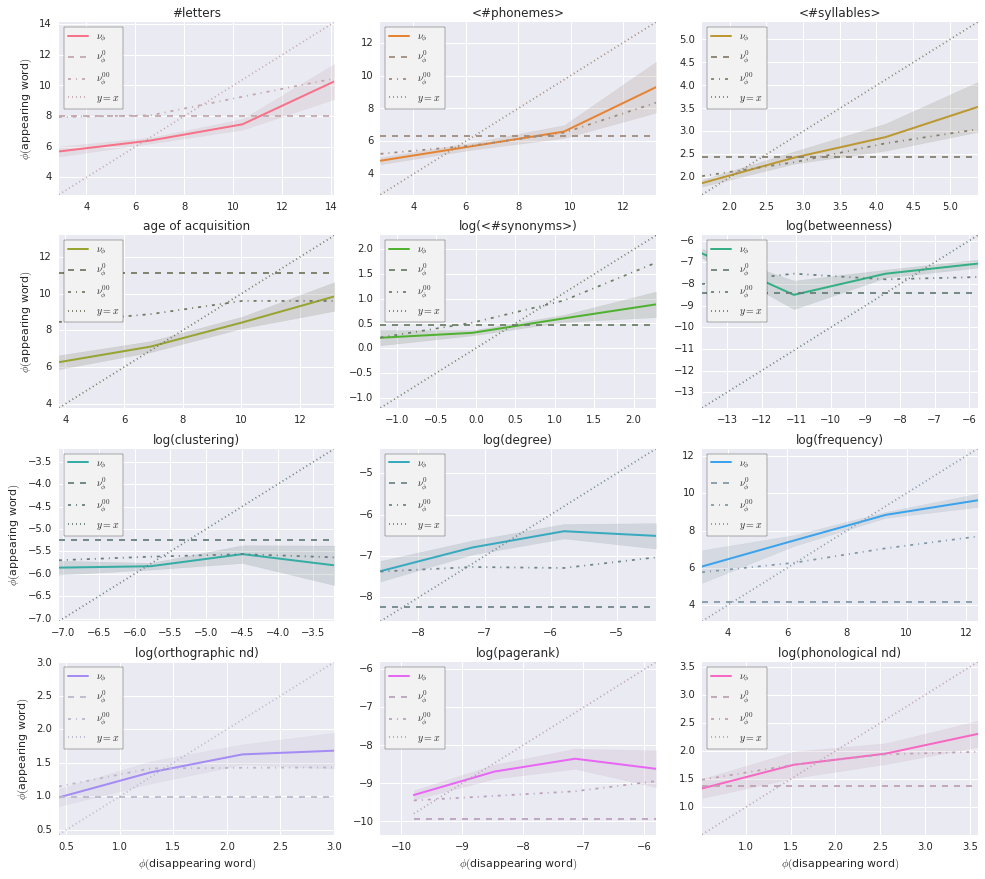

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

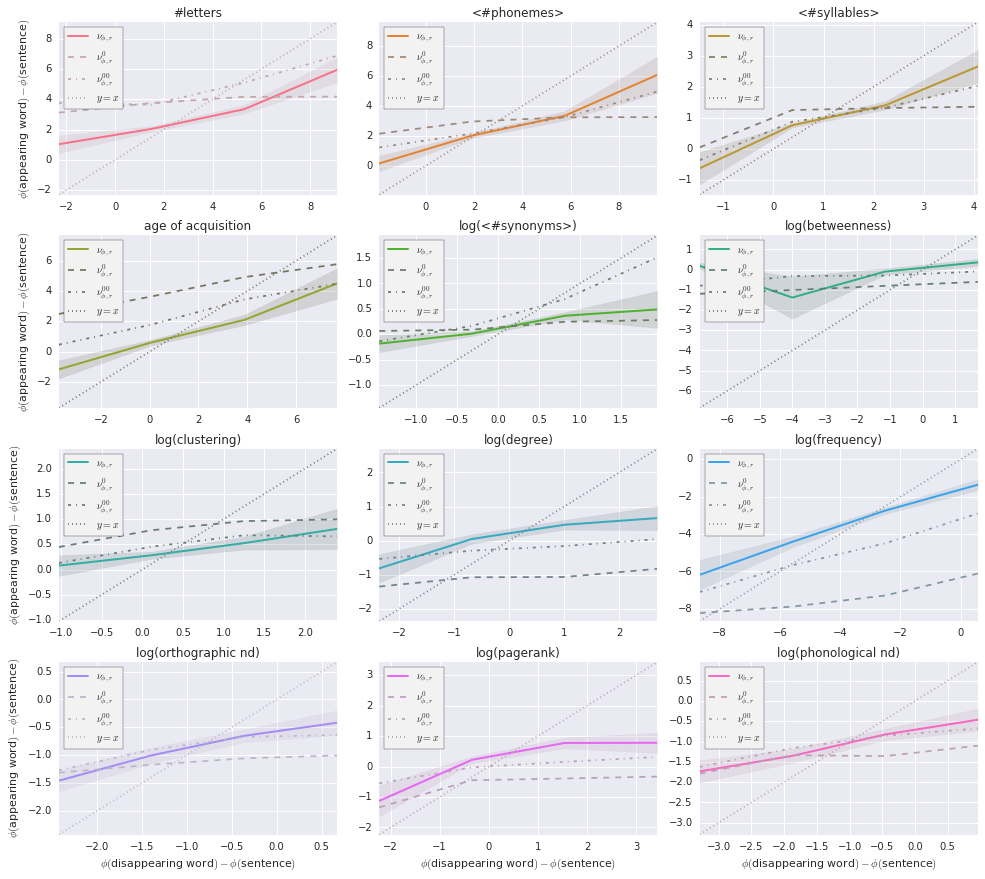

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

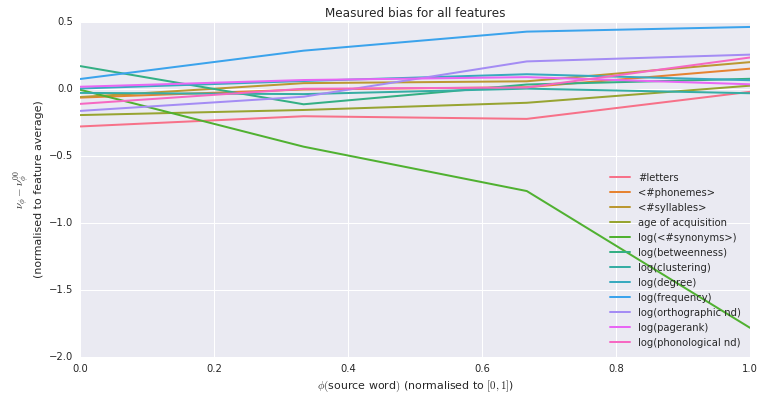

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

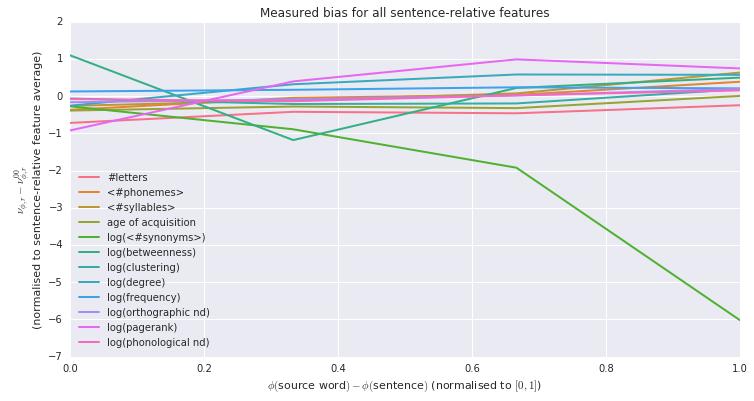

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

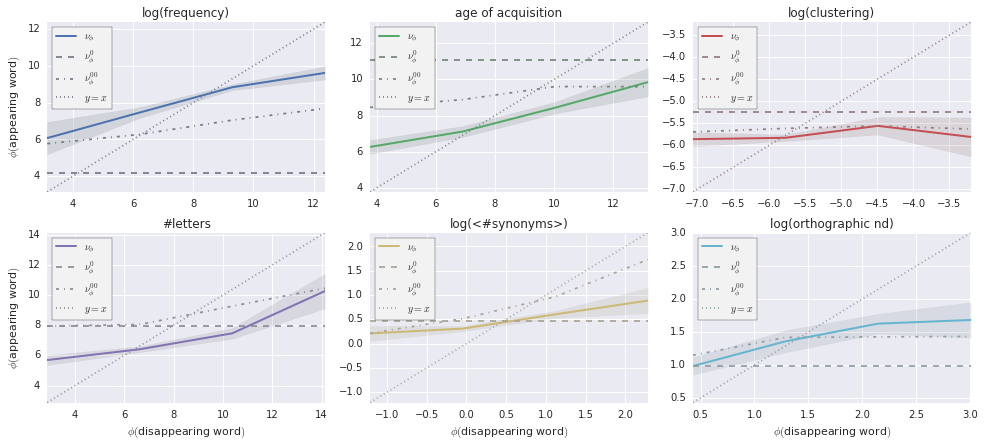

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

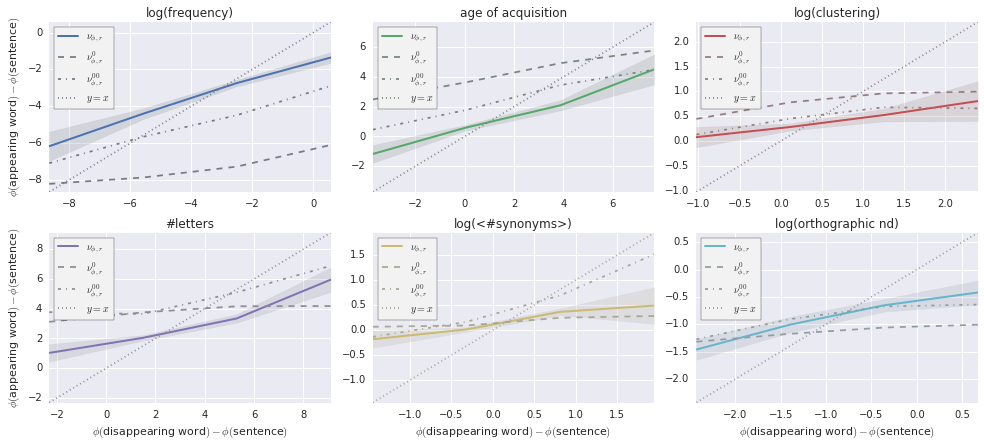

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

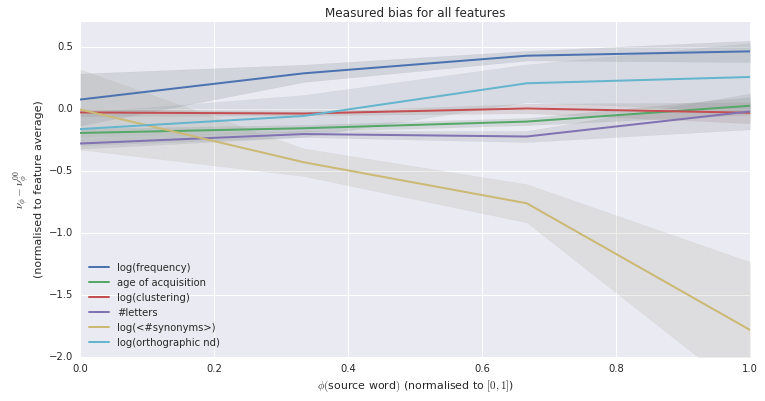

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

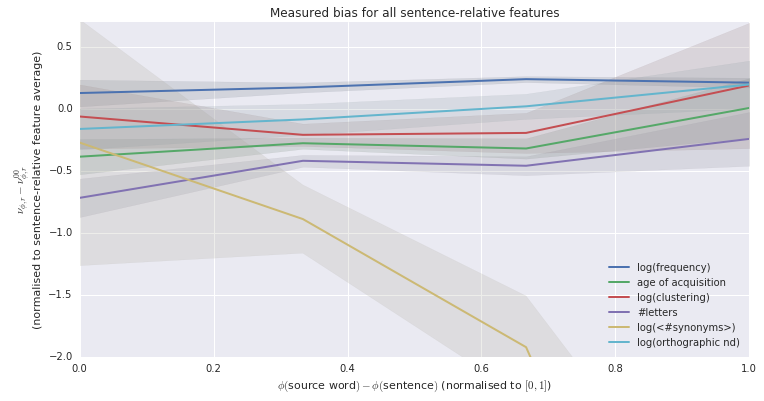

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


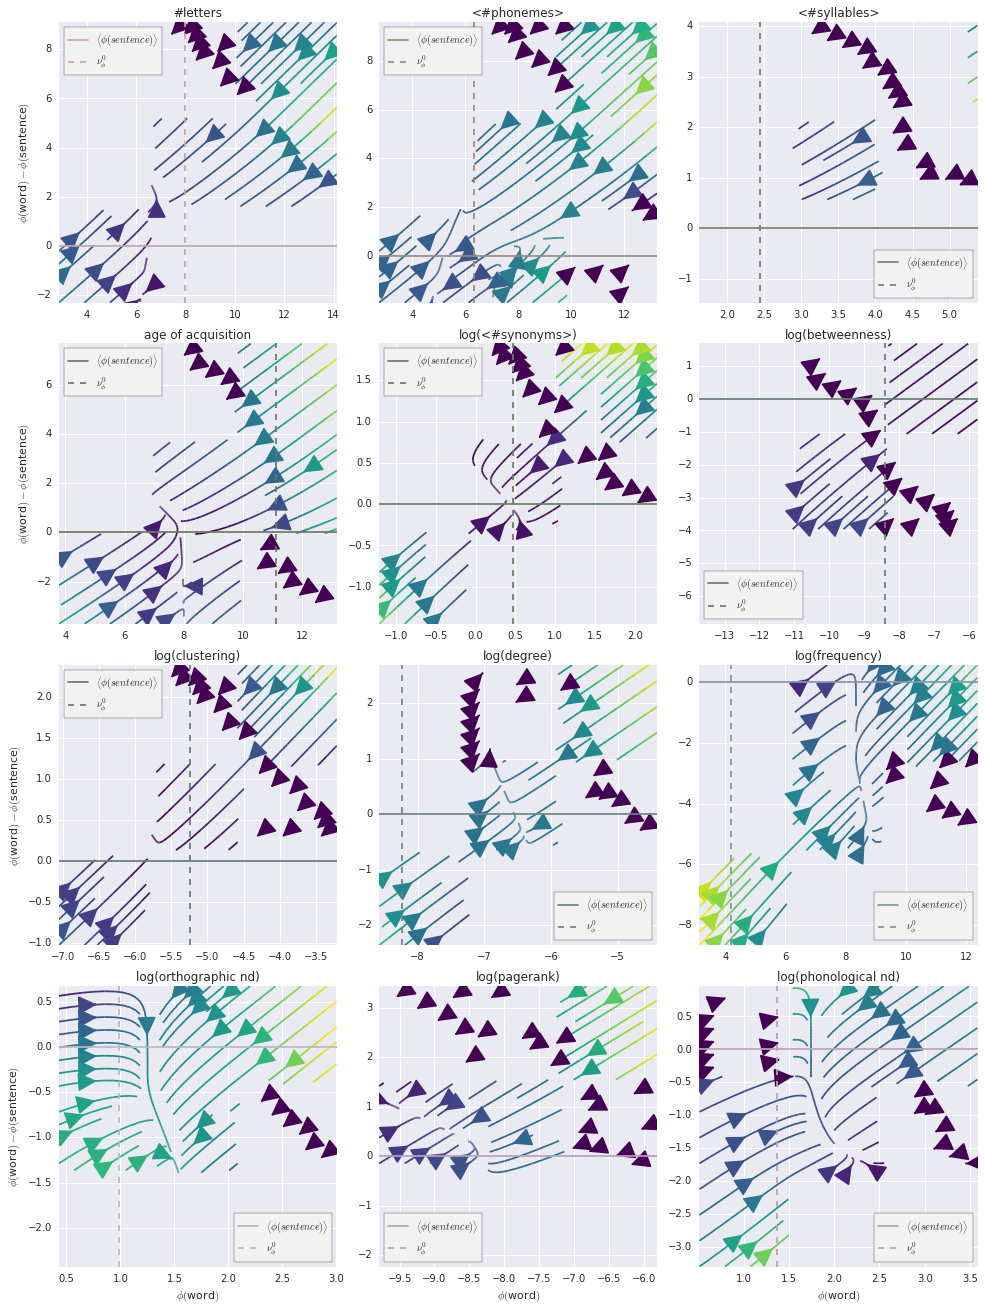

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


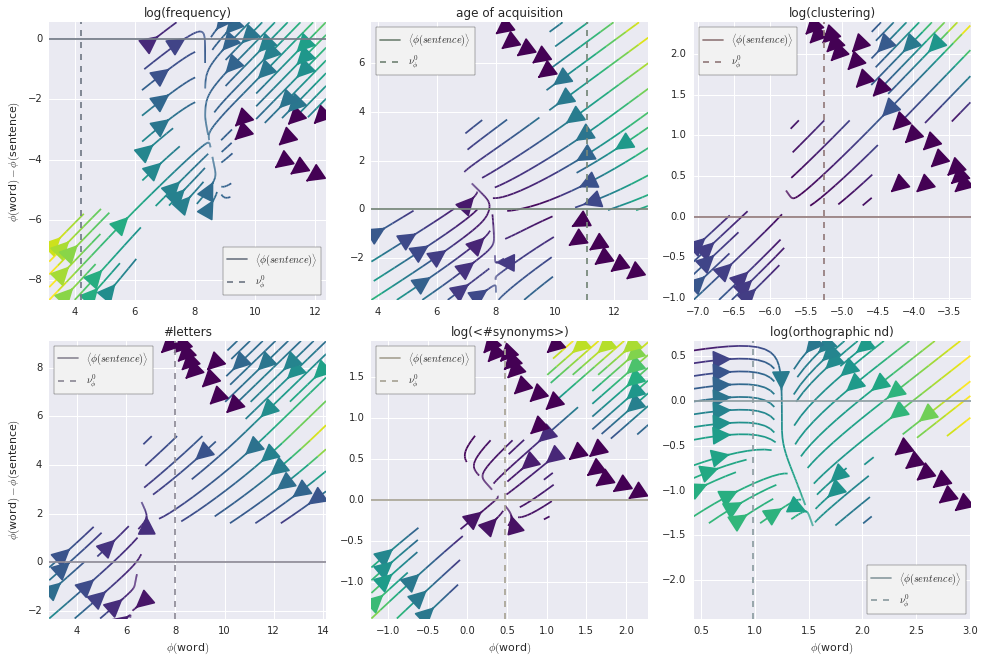

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55148666  0.17251839  0.07033411  0.06740768  0.03493058  0.02760335
  0.01979846  0.01815547  0.01660056  0.00888656]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.492361,0.244981,-0.083112,0.233541,0.208330,-0.444599,0.211109,0.259101,-0.420029,0.280997,-0.167039,0.007773
Component-1,-0.401657,0.379185,-0.131306,0.279047,0.233905,0.413231,-0.150198,0.287212,0.438423,-0.223164,0.164641,-0.011671
Component-2,-0.729173,-0.368929,0.116568,-0.157104,-0.490054,0.065141,0.003981,-0.164406,0.019498,-0.135667,0.021410,0.056944


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 9180) |              | Elapsed Time: 0:00:59 ETA:  6 days, 7:15:08

  0% (  80 of 9180) |                      | Elapsed Time: 0:01:00 ETA:  0:00:56

  1% ( 115 of 9180) |                      | Elapsed Time: 0:01:00 ETA:  0:00:59

  2% ( 184 of 9180) |                      | Elapsed Time: 0:01:01 ETA:  0:01:03

  2% ( 230 of 9180) |                      | Elapsed Time: 0:01:02 ETA:  0:01:01

  3% ( 302 of 9180) |                      | Elapsed Time: 0:01:03 ETA:  0:01:01

  3% ( 345 of 9180) |                      | Elapsed Time: 0:01:04 ETA:  0:01:01

  4% ( 423 of 9180) |#                     | Elapsed Time: 0:01:05 ETA:  0:00:59

  5% ( 459 of 9180) |#                     | Elapsed Time: 0:01:05 ETA:  0:01:01

  5% ( 515 of 9180) |#                     | Elapsed Time: 0:01:06 ETA:  0:01:04

  6% ( 574 of 9180) |#                     | Elapsed Time: 0:01:07 ETA:  0:01:05

  6% ( 635 of 9180) |#                     | Elapsed Time: 0:01:08 ETA:  0:01:07

  7% ( 689 of 9180) |#                     | Elapsed Time: 0:01:09 ETA:  0:01:08

  8% ( 741 of 9180) |#                     | Elapsed Time: 0:01:10 ETA:  0:01:13

  8% ( 788 of 9180) |#                     | Elapsed Time: 0:01:11 ETA:  0:01:20

  8% ( 804 of 9180) |#                     | Elapsed Time: 0:01:11 ETA:  0:01:22

  9% ( 855 of 9180) |##                    | Elapsed Time: 0:01:12 ETA:  0:01:30

 10% ( 918 of 9180) |##                    | Elapsed Time: 0:01:13 ETA:  0:01:28

 10% ( 994 of 9180) |##                    | Elapsed Time: 0:01:14 ETA:  0:01:24

 11% (1033 of 9180) |##                    | Elapsed Time: 0:01:15 ETA:  0:01:22

 12% (1128 of 9180) |##                    | Elapsed Time: 0:01:16 ETA:  0:01:08

 12% (1148 of 9180) |##                    | Elapsed Time: 0:01:16 ETA:  0:01:03

 13% (1217 of 9180) |##                    | Elapsed Time: 0:01:17 ETA:  0:00:55

 13% (1263 of 9180) |###                   | Elapsed Time: 0:01:18 ETA:  0:00:52

 14% (1333 of 9180) |###                   | Elapsed Time: 0:01:19 ETA:  0:00:46

 15% (1377 of 9180) |###                   | Elapsed Time: 0:01:19 ETA:  0:00:40

 15% (1440 of 9180) |###                   | Elapsed Time: 0:01:20 ETA:  0:00:42

 16% (1492 of 9180) |###                   | Elapsed Time: 0:01:21 ETA:  0:00:40

 17% (1567 of 9180) |###                   | Elapsed Time: 0:01:22 ETA:  0:00:39

 17% (1607 of 9180) |###                   | Elapsed Time: 0:01:22 ETA:  0:00:42

 18% (1690 of 9180) |####                  | Elapsed Time: 0:01:23 ETA:  0:00:38

 18% (1722 of 9180) |####                  | Elapsed Time: 0:01:24 ETA:  0:00:37

 19% (1806 of 9180) |####                  | Elapsed Time: 0:01:25 ETA:  0:00:33

 20% (1836 of 9180) |####                  | Elapsed Time: 0:01:25 ETA:  0:00:32

 20% (1915 of 9180) |####                  | Elapsed Time: 0:01:26 ETA:  0:00:32

 21% (1951 of 9180) |####                  | Elapsed Time: 0:01:27 ETA:  0:00:26

 22% (2034 of 9180) |####                  | Elapsed Time: 0:01:28 ETA:  0:00:26

 22% (2066 of 9180) |####                  | Elapsed Time: 0:01:28 ETA:  0:00:24

 23% (2152 of 9180) |#####                 | Elapsed Time: 0:01:29 ETA:  0:00:22

 23% (2181 of 9180) |#####                 | Elapsed Time: 0:01:29 ETA:  0:00:23

 24% (2252 of 9180) |#####                 | Elapsed Time: 0:01:30 ETA:  0:00:23

 25% (2295 of 9180) |#####                 | Elapsed Time: 0:01:31 ETA:  0:00:23

 25% (2384 of 9180) |#####                 | Elapsed Time: 0:01:32 ETA:  0:00:20

 26% (2410 of 9180) |#####                 | Elapsed Time: 0:01:32 ETA:  0:00:19

 27% (2497 of 9180) |#####                 | Elapsed Time: 0:01:33 ETA:  0:00:18

 27% (2525 of 9180) |######                | Elapsed Time: 0:01:34 ETA:  0:00:17

 28% (2609 of 9180) |######                | Elapsed Time: 0:01:35 ETA:  0:00:16

 28% (2640 of 9180) |######                | Elapsed Time: 0:01:35 ETA:  0:00:18

 30% (2754 of 9180) |######                | Elapsed Time: 0:01:36 ETA:  0:00:08

 31% (2869 of 9180) |######                | Elapsed Time: 0:01:37 ETA:  0:00:04

 32% (2959 of 9180) |#######               | Elapsed Time: 0:01:38 ETA:  0:00:03

 32% (2984 of 9180) |#######               | Elapsed Time: 0:01:39 ETA:  0:00:02

 33% (3071 of 9180) |#######               | Elapsed Time: 0:01:40 ETA:  0:00:02

 33% (3099 of 9180) |#######               | Elapsed Time: 0:01:40 ETA:  0:00:00

 34% (3176 of 9180) |#######               | Elapsed Time: 0:01:41 ETA:  0:00:00

 35% (3213 of 9180) |#######               | Elapsed Time: 0:01:41 ETA:  0:00:01

 35% (3291 of 9180) |#######               | Elapsed Time: 0:01:42 ETA:  0:00:02

 36% (3328 of 9180) |#######               | Elapsed Time: 0:01:43 ETA:  0:00:05

 37% (3406 of 9180) |########              | Elapsed Time: 0:01:44 ETA:  0:00:06

 37% (3443 of 9180) |########              | Elapsed Time: 0:01:44 ETA:  0:00:07

 38% (3501 of 9180) |########              | Elapsed Time: 0:01:45 ETA:  0:00:12

 38% (3558 of 9180) |########              | Elapsed Time: 0:01:46 ETA:  0:00:13

 39% (3629 of 9180) |########              | Elapsed Time: 0:01:47 ETA:  0:00:15

 40% (3672 of 9180) |########              | Elapsed Time: 0:01:48 ETA:  0:00:17

 40% (3739 of 9180) |########              | Elapsed Time: 0:01:49 ETA:  0:00:19

 41% (3787 of 9180) |#########             | Elapsed Time: 0:01:49 ETA:  0:00:20

 42% (3902 of 9180) |#########             | Elapsed Time: 0:01:51 ETA:  0:00:12

 43% (4000 of 9180) |#########             | Elapsed Time: 0:01:52 ETA:  0:00:07

 43% (4017 of 9180) |#########             | Elapsed Time: 0:01:52 ETA:  0:00:02

 44% (4091 of 9180) |#########             | Elapsed Time: 0:01:53 ETA:  0:00:02

 45% (4131 of 9180) |#########             | Elapsed Time: 0:01:53 ETA:  0:00:01

 45% (4208 of 9180) |##########            | Elapsed Time: 0:01:54 ETA:  0:00:00

 46% (4246 of 9180) |##########            | Elapsed Time: 0:01:55 ETA:  0:00:00

 46% (4296 of 9180) |##########            | Elapsed Time: 0:01:56 ETA:  0:00:00

 47% (4361 of 9180) |##########            | Elapsed Time: 0:01:57 ETA:  0:00:02

 48% (4443 of 9180) |##########            | Elapsed Time: 0:01:58 ETA:  0:00:01

 48% (4476 of 9180) |##########            | Elapsed Time: 0:01:58 ETA:  0:00:07

 49% (4550 of 9180) |##########            | Elapsed Time: 0:01:59 ETA:  0:00:06

 50% (4590 of 9180) |###########           | Elapsed Time: 0:02:00 ETA:  0:00:05

 50% (4676 of 9180) |###########           | Elapsed Time: 0:02:01 ETA:  0:00:01

 51% (4705 of 9180) |###########           | Elapsed Time: 0:02:01 ETA:  0:00:01

 52% (4780 of 9180) |###########           | Elapsed Time: 0:02:02 ETA:  0:00:01

 52% (4820 of 9180) |###########           | Elapsed Time: 0:02:03 ETA:  0:00:00

 53% (4898 of 9180) |###########           | Elapsed Time: 0:02:04 ETA:  0:00:00

 53% (4935 of 9180) |###########           | Elapsed Time: 0:02:04 ETA:  0:00:00

 54% (4989 of 9180) |###########           | Elapsed Time: 0:02:08 ETA:  0:00:42

 55% (5049 of 9180) |############          | Elapsed Time: 0:02:09 ETA:  0:00:44

 56% (5164 of 9180) |############          | Elapsed Time: 0:02:10 ETA:  0:00:41

 56% (5227 of 9180) |############          | Elapsed Time: 0:02:11 ETA:  0:00:40

 57% (5279 of 9180) |############          | Elapsed Time: 0:02:12 ETA:  0:00:41

 58% (5363 of 9180) |############          | Elapsed Time: 0:02:13 ETA:  0:00:32

 58% (5394 of 9180) |############          | Elapsed Time: 0:02:13 ETA:  0:00:36

 59% (5473 of 9180) |#############         | Elapsed Time: 0:02:14 ETA:  0:00:31

 60% (5508 of 9180) |#############         | Elapsed Time: 0:02:15 ETA:  0:00:00

 60% (5592 of 9180) |#############         | Elapsed Time: 0:02:16 ETA:  0:00:00

 61% (5623 of 9180) |#############         | Elapsed Time: 0:02:16 ETA:  0:00:00

 61% (5687 of 9180) |#############         | Elapsed Time: 0:02:17 ETA:  0:00:00

 62% (5738 of 9180) |#############         | Elapsed Time: 0:02:18 ETA:  0:00:00

 63% (5829 of 9180) |#############         | Elapsed Time: 0:02:19 ETA:  0:00:00

 63% (5853 of 9180) |##############        | Elapsed Time: 0:02:19 ETA:  0:00:00

 64% (5932 of 9180) |##############        | Elapsed Time: 0:02:20 ETA:  0:00:00

 65% (5967 of 9180) |##############        | Elapsed Time: 0:02:20 ETA:  0:00:00

 65% (6037 of 9180) |##############        | Elapsed Time: 0:02:21 ETA:  0:00:00

 66% (6082 of 9180) |##############        | Elapsed Time: 0:02:22 ETA:  0:00:00

 67% (6169 of 9180) |##############        | Elapsed Time: 0:02:23 ETA:  0:00:00

 67% (6197 of 9180) |##############        | Elapsed Time: 0:02:23 ETA:  0:00:00

 68% (6276 of 9180) |###############       | Elapsed Time: 0:02:24 ETA:  0:00:00

 68% (6312 of 9180) |###############       | Elapsed Time: 0:02:25 ETA:  0:00:00

 69% (6400 of 9180) |###############       | Elapsed Time: 0:02:26 ETA:  0:00:00

 70% (6426 of 9180) |###############       | Elapsed Time: 0:02:26 ETA:  0:00:00

 70% (6507 of 9180) |###############       | Elapsed Time: 0:02:27 ETA:  0:00:00

 71% (6541 of 9180) |###############       | Elapsed Time: 0:02:28 ETA:  0:00:00

 72% (6622 of 9180) |###############       | Elapsed Time: 0:02:29 ETA:  0:00:00

 72% (6656 of 9180) |###############       | Elapsed Time: 0:02:29 ETA:  0:00:00

 73% (6739 of 9180) |################      | Elapsed Time: 0:02:30 ETA:  0:00:00

 73% (6771 of 9180) |################      | Elapsed Time: 0:02:30 ETA:  0:00:00

 74% (6858 of 9180) |################      | Elapsed Time: 0:02:31 ETA:  0:00:00

 75% (6885 of 9180) |################      | Elapsed Time: 0:02:32 ETA:  0:00:00

 75% (6971 of 9180) |################      | Elapsed Time: 0:02:33 ETA:  0:00:00

 76% (7000 of 9180) |################      | Elapsed Time: 0:02:33 ETA:  0:00:00

 76% (7060 of 9180) |################      | Elapsed Time: 0:02:34 ETA:  0:00:00

 77% (7115 of 9180) |#################     | Elapsed Time: 0:02:35 ETA:  0:00:00

 78% (7207 of 9180) |#################     | Elapsed Time: 0:02:36 ETA:  0:00:00

 78% (7230 of 9180) |#################     | Elapsed Time: 0:02:36 ETA:  0:00:00

 79% (7317 of 9180) |#################     | Elapsed Time: 0:02:37 ETA:  0:00:00

 80% (7344 of 9180) |#################     | Elapsed Time: 0:02:38 ETA:  0:00:00

 80% (7429 of 9180) |#################     | Elapsed Time: 0:02:39 ETA:  0:00:00

 81% (7459 of 9180) |#################     | Elapsed Time: 0:02:39 ETA:  0:00:00

 81% (7505 of 9180) |#################     | Elapsed Time: 0:02:40 ETA:  0:00:00

 82% (7574 of 9180) |##################    | Elapsed Time: 0:02:41 ETA:  0:00:00

 83% (7654 of 9180) |##################    | Elapsed Time: 0:02:42 ETA:  0:00:00

 83% (7689 of 9180) |##################    | Elapsed Time: 0:02:42 ETA:  0:00:00

 84% (7737 of 9180) |##################    | Elapsed Time: 0:02:43 ETA:  0:00:00

 85% (7803 of 9180) |##################    | Elapsed Time: 0:02:44 ETA:  0:00:00

 85% (7889 of 9180) |##################    | Elapsed Time: 0:02:45 ETA:  0:00:00

 86% (7918 of 9180) |##################    | Elapsed Time: 0:02:45 ETA:  0:00:00

 87% (8002 of 9180) |###################   | Elapsed Time: 0:02:46 ETA:  0:00:00

 87% (8033 of 9180) |###################   | Elapsed Time: 0:02:47 ETA:  0:00:00

 88% (8095 of 9180) |###################   | Elapsed Time: 0:02:48 ETA:  0:00:00

 88% (8148 of 9180) |###################   | Elapsed Time: 0:02:48 ETA:  0:00:00

 89% (8219 of 9180) |###################   | Elapsed Time: 0:02:49 ETA:  0:00:00

 90% (8262 of 9180) |###################   | Elapsed Time: 0:02:50 ETA:  0:00:00

 90% (8345 of 9180) |###################   | Elapsed Time: 0:02:51 ETA:  0:00:00

 91% (8377 of 9180) |####################  | Elapsed Time: 0:02:51 ETA:  0:00:00

 91% (8441 of 9180) |####################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 92% (8492 of 9180) |####################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 93% (8580 of 9180) |####################  | Elapsed Time: 0:02:54 ETA:  0:00:00

 93% (8607 of 9180) |####################  | Elapsed Time: 0:02:55 ETA:  0:00:00

 94% (8692 of 9180) |####################  | Elapsed Time: 0:02:56 ETA:  0:00:00

 95% (8721 of 9180) |####################  | Elapsed Time: 0:02:56 ETA:  0:00:00

 95% (8805 of 9180) |##################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 96% (8836 of 9180) |##################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 97% (8909 of 9180) |##################### | Elapsed Time: 0:02:58 ETA:  0:00:00

 97% (8951 of 9180) |##################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 98% (9019 of 9180) |##################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 98% (9066 of 9180) |##################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 99% (9146 of 9180) |##################### | Elapsed Time: 0:03:01 ETA:  0:00:00

100% (9180 of 9180) |######################| Elapsed Time: 0:03:02 Time: 0:03:02


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

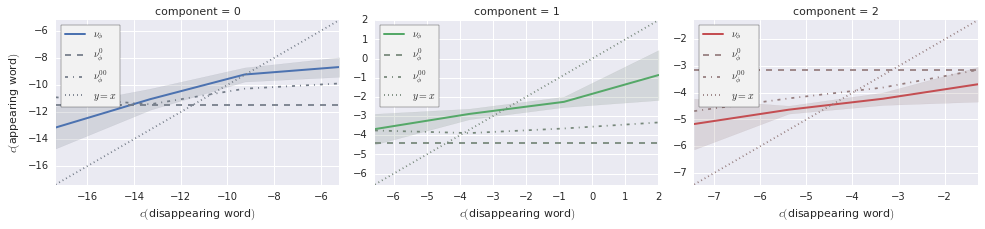

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.59461772  0.17669317  0.125276  ]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.709892,-0.107538,0.271961,-0.577025,0.278432,0.006607
Component-1,0.480132,0.165357,-0.432505,-0.691438,0.277431,0.003886
Component-2,-0.498902,0.104078,-0.834833,0.197896,-0.007773,0.063990


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 9180) |              | Elapsed Time: 0:00:15 ETA:  1 day, 15:38:50

  0% (  87 of 9180) |                      | Elapsed Time: 0:00:16 ETA:  0:01:30

  1% ( 115 of 9180) |                      | Elapsed Time: 0:00:16 ETA:  0:01:33

  2% ( 198 of 9180) |                      | Elapsed Time: 0:00:17 ETA:  0:01:32

  2% ( 230 of 9180) |                      | Elapsed Time: 0:00:18 ETA:  0:01:31

  3% ( 319 of 9180) |                      | Elapsed Time: 0:00:19 ETA:  0:01:28

  3% ( 345 of 9180) |                      | Elapsed Time: 0:00:19 ETA:  0:01:27

  4% ( 432 of 9180) |#                     | Elapsed Time: 0:00:20 ETA:  0:01:26

  5% ( 459 of 9180) |#                     | Elapsed Time: 0:00:21 ETA:  0:01:28

  5% ( 538 of 9180) |#                     | Elapsed Time: 0:00:22 ETA:  0:01:28

  6% ( 574 of 9180) |#                     | Elapsed Time: 0:00:22 ETA:  0:01:28

  7% ( 654 of 9180) |#                     | Elapsed Time: 0:00:23 ETA:  0:01:27

  7% ( 689 of 9180) |#                     | Elapsed Time: 0:00:23 ETA:  0:01:28

  8% ( 768 of 9180) |#                     | Elapsed Time: 0:00:24 ETA:  0:01:29

  8% ( 804 of 9180) |#                     | Elapsed Time: 0:00:25 ETA:  0:01:31

  9% ( 872 of 9180) |##                    | Elapsed Time: 0:00:26 ETA:  0:01:33

 10% ( 918 of 9180) |##                    | Elapsed Time: 0:00:27 ETA:  0:01:36

 10% (1003 of 9180) |##                    | Elapsed Time: 0:00:28 ETA:  0:01:31

 11% (1033 of 9180) |##                    | Elapsed Time: 0:00:28 ETA:  0:01:31

 12% (1126 of 9180) |##                    | Elapsed Time: 0:00:29 ETA:  0:01:28

 12% (1148 of 9180) |##                    | Elapsed Time: 0:00:29 ETA:  0:01:30

 13% (1222 of 9180) |##                    | Elapsed Time: 0:00:30 ETA:  0:01:28

 13% (1263 of 9180) |###                   | Elapsed Time: 0:00:31 ETA:  0:01:28

 14% (1343 of 9180) |###                   | Elapsed Time: 0:00:32 ETA:  0:01:26

 15% (1377 of 9180) |###                   | Elapsed Time: 0:00:32 ETA:  0:01:22

 15% (1463 of 9180) |###                   | Elapsed Time: 0:00:33 ETA:  0:01:18

 16% (1492 of 9180) |###                   | Elapsed Time: 0:00:34 ETA:  0:01:18

 17% (1574 of 9180) |###                   | Elapsed Time: 0:00:35 ETA:  0:01:17

 17% (1607 of 9180) |###                   | Elapsed Time: 0:00:35 ETA:  0:01:19

 18% (1701 of 9180) |####                  | Elapsed Time: 0:00:36 ETA:  0:01:14

 18% (1722 of 9180) |####                  | Elapsed Time: 0:00:36 ETA:  0:01:11

 19% (1818 of 9180) |####                  | Elapsed Time: 0:00:37 ETA:  0:01:07

 20% (1836 of 9180) |####                  | Elapsed Time: 0:00:38 ETA:  0:01:05

 20% (1927 of 9180) |####                  | Elapsed Time: 0:00:39 ETA:  0:01:05

 21% (1951 of 9180) |####                  | Elapsed Time: 0:00:39 ETA:  0:01:04

 22% (2032 of 9180) |####                  | Elapsed Time: 0:00:40 ETA:  0:01:04

 22% (2066 of 9180) |####                  | Elapsed Time: 0:00:40 ETA:  0:01:03

 23% (2141 of 9180) |#####                 | Elapsed Time: 0:00:41 ETA:  0:01:04

 23% (2181 of 9180) |#####                 | Elapsed Time: 0:00:42 ETA:  0:01:07

 24% (2266 of 9180) |#####                 | Elapsed Time: 0:00:43 ETA:  0:01:06

 25% (2295 of 9180) |#####                 | Elapsed Time: 0:00:43 ETA:  0:01:09

 26% (2410 of 9180) |#####                 | Elapsed Time: 0:00:44 ETA:  0:01:06

 27% (2525 of 9180) |######                | Elapsed Time: 0:00:46 ETA:  0:00:59

 28% (2619 of 9180) |######                | Elapsed Time: 0:00:47 ETA:  0:00:57

 28% (2640 of 9180) |######                | Elapsed Time: 0:00:47 ETA:  0:00:55

 29% (2729 of 9180) |######                | Elapsed Time: 0:00:48 ETA:  0:00:52

 30% (2754 of 9180) |######                | Elapsed Time: 0:00:48 ETA:  0:00:49

 31% (2869 of 9180) |######                | Elapsed Time: 0:00:49 ETA:  0:00:44

 32% (2984 of 9180) |#######               | Elapsed Time: 0:00:50 ETA:  0:00:44

 33% (3075 of 9180) |#######               | Elapsed Time: 0:00:51 ETA:  0:00:44

 33% (3099 of 9180) |#######               | Elapsed Time: 0:00:52 ETA:  0:00:43

 35% (3213 of 9180) |#######               | Elapsed Time: 0:00:53 ETA:  0:00:39

 35% (3300 of 9180) |#######               | Elapsed Time: 0:00:54 ETA:  0:00:40

 36% (3328 of 9180) |#######               | Elapsed Time: 0:00:54 ETA:  0:00:43

 37% (3423 of 9180) |########              | Elapsed Time: 0:00:55 ETA:  0:00:42

 37% (3443 of 9180) |########              | Elapsed Time: 0:00:55 ETA:  0:00:43

 38% (3534 of 9180) |########              | Elapsed Time: 0:00:56 ETA:  0:00:42

 38% (3558 of 9180) |########              | Elapsed Time: 0:00:56 ETA:  0:00:41

 40% (3672 of 9180) |########              | Elapsed Time: 0:00:58 ETA:  0:00:40

 41% (3765 of 9180) |#########             | Elapsed Time: 0:00:59 ETA:  0:00:39

 41% (3787 of 9180) |#########             | Elapsed Time: 0:00:59 ETA:  0:00:38

 42% (3902 of 9180) |#########             | Elapsed Time: 0:01:00 ETA:  0:00:37

 43% (3995 of 9180) |#########             | Elapsed Time: 0:01:01 ETA:  0:00:36

 43% (4017 of 9180) |#########             | Elapsed Time: 0:01:01 ETA:  0:00:35

 44% (4102 of 9180) |#########             | Elapsed Time: 0:01:02 ETA:  0:00:36

 45% (4131 of 9180) |#########             | Elapsed Time: 0:01:03 ETA:  0:00:39

 45% (4216 of 9180) |##########            | Elapsed Time: 0:01:04 ETA:  0:00:38

 46% (4246 of 9180) |##########            | Elapsed Time: 0:01:04 ETA:  0:00:38

 46% (4304 of 9180) |##########            | Elapsed Time: 0:01:05 ETA:  0:00:43

 47% (4361 of 9180) |##########            | Elapsed Time: 0:01:06 ETA:  0:00:44

 48% (4476 of 9180) |##########            | Elapsed Time: 0:01:07 ETA:  0:00:41

 49% (4558 of 9180) |##########            | Elapsed Time: 0:01:08 ETA:  0:00:40

 50% (4590 of 9180) |###########           | Elapsed Time: 0:01:08 ETA:  0:00:42

 50% (4680 of 9180) |###########           | Elapsed Time: 0:01:09 ETA:  0:00:39

 51% (4705 of 9180) |###########           | Elapsed Time: 0:01:10 ETA:  0:00:38

 52% (4796 of 9180) |###########           | Elapsed Time: 0:01:11 ETA:  0:00:37

 52% (4820 of 9180) |###########           | Elapsed Time: 0:01:11 ETA:  0:00:31

 53% (4900 of 9180) |###########           | Elapsed Time: 0:01:12 ETA:  0:00:32

 53% (4935 of 9180) |###########           | Elapsed Time: 0:01:12 ETA:  0:00:38

 54% (5013 of 9180) |############          | Elapsed Time: 0:01:13 ETA:  0:00:38

 55% (5049 of 9180) |############          | Elapsed Time: 0:01:14 ETA:  0:00:40

 55% (5134 of 9180) |############          | Elapsed Time: 0:01:15 ETA:  0:00:37

 56% (5164 of 9180) |############          | Elapsed Time: 0:01:15 ETA:  0:00:37

 56% (5221 of 9180) |############          | Elapsed Time: 0:01:16 ETA:  0:00:43

 57% (5279 of 9180) |############          | Elapsed Time: 0:01:17 ETA:  0:00:49

 58% (5349 of 9180) |############          | Elapsed Time: 0:01:18 ETA:  0:00:50

 58% (5394 of 9180) |############          | Elapsed Time: 0:01:19 ETA:  0:00:52

 59% (5473 of 9180) |#############         | Elapsed Time: 0:01:20 ETA:  0:00:48

 60% (5508 of 9180) |#############         | Elapsed Time: 0:01:21 ETA:  0:00:55

 60% (5568 of 9180) |#############         | Elapsed Time: 0:01:22 ETA:  0:00:55

 61% (5623 of 9180) |#############         | Elapsed Time: 0:01:23 ETA:  0:00:58

 62% (5697 of 9180) |#############         | Elapsed Time: 0:01:24 ETA:  0:00:58

 62% (5738 of 9180) |#############         | Elapsed Time: 0:01:24 ETA:  0:00:53

 63% (5829 of 9180) |#############         | Elapsed Time: 0:01:25 ETA:  0:00:44

 63% (5853 of 9180) |##############        | Elapsed Time: 0:01:25 ETA:  0:00:43

 64% (5933 of 9180) |##############        | Elapsed Time: 0:01:26 ETA:  0:00:39

 65% (5967 of 9180) |##############        | Elapsed Time: 0:01:27 ETA:  0:00:37

 65% (6042 of 9180) |##############        | Elapsed Time: 0:01:28 ETA:  0:00:31

 66% (6082 of 9180) |##############        | Elapsed Time: 0:01:28 ETA:  0:00:28

 67% (6162 of 9180) |##############        | Elapsed Time: 0:01:29 ETA:  0:00:25

 67% (6197 of 9180) |##############        | Elapsed Time: 0:01:30 ETA:  0:00:26

 68% (6273 of 9180) |###############       | Elapsed Time: 0:01:31 ETA:  0:00:25

 68% (6312 of 9180) |###############       | Elapsed Time: 0:01:32 ETA:  0:00:30

 69% (6401 of 9180) |###############       | Elapsed Time: 0:01:33 ETA:  0:00:26

 70% (6426 of 9180) |###############       | Elapsed Time: 0:01:33 ETA:  0:00:27

 70% (6493 of 9180) |###############       | Elapsed Time: 0:01:34 ETA:  0:00:30

 71% (6541 of 9180) |###############       | Elapsed Time: 0:01:34 ETA:  0:00:28

 72% (6615 of 9180) |###############       | Elapsed Time: 0:01:35 ETA:  0:00:26

 72% (6656 of 9180) |###############       | Elapsed Time: 0:01:36 ETA:  0:00:27

 73% (6771 of 9180) |################      | Elapsed Time: 0:01:37 ETA:  0:00:18

 74% (6867 of 9180) |################      | Elapsed Time: 0:01:38 ETA:  0:00:11

 75% (6885 of 9180) |################      | Elapsed Time: 0:01:38 ETA:  0:00:13

 75% (6955 of 9180) |################      | Elapsed Time: 0:01:39 ETA:  0:00:14

 76% (7000 of 9180) |################      | Elapsed Time: 0:01:40 ETA:  0:00:11

 77% (7070 of 9180) |################      | Elapsed Time: 0:01:41 ETA:  0:00:13

 77% (7115 of 9180) |#################     | Elapsed Time: 0:01:42 ETA:  0:00:11

 78% (7207 of 9180) |#################     | Elapsed Time: 0:01:43 ETA:  0:00:06

 78% (7230 of 9180) |#################     | Elapsed Time: 0:01:43 ETA:  0:00:08

 79% (7324 of 9180) |#################     | Elapsed Time: 0:01:44 ETA:  0:00:07

 80% (7344 of 9180) |#################     | Elapsed Time: 0:01:44 ETA:  0:00:09

 80% (7434 of 9180) |#################     | Elapsed Time: 0:01:45 ETA:  0:00:05

 81% (7459 of 9180) |#################     | Elapsed Time: 0:01:45 ETA:  0:00:02

 81% (7510 of 9180) |#################     | Elapsed Time: 0:01:46 ETA:  0:00:07

 82% (7574 of 9180) |##################    | Elapsed Time: 0:01:47 ETA:  0:00:02

 83% (7646 of 9180) |##################    | Elapsed Time: 0:01:48 ETA:  0:00:04

 83% (7689 of 9180) |##################    | Elapsed Time: 0:01:49 ETA:  0:00:06

 84% (7735 of 9180) |##################    | Elapsed Time: 0:01:50 ETA:  0:00:13

 85% (7803 of 9180) |##################    | Elapsed Time: 0:01:51 ETA:  0:00:17

 85% (7875 of 9180) |##################    | Elapsed Time: 0:01:52 ETA:  0:00:17

 86% (7918 of 9180) |##################    | Elapsed Time: 0:01:52 ETA:  0:00:21

 87% (8010 of 9180) |###################   | Elapsed Time: 0:01:53 ETA:  0:00:16

 87% (8033 of 9180) |###################   | Elapsed Time: 0:01:54 ETA:  0:00:12

 88% (8109 of 9180) |###################   | Elapsed Time: 0:01:55 ETA:  0:00:13

 88% (8148 of 9180) |###################   | Elapsed Time: 0:01:55 ETA:  0:00:11

 89% (8226 of 9180) |###################   | Elapsed Time: 0:01:56 ETA:  0:00:10

 90% (8262 of 9180) |###################   | Elapsed Time: 0:01:57 ETA:  0:00:03

 90% (8339 of 9180) |###################   | Elapsed Time: 0:01:58 ETA:  0:00:02

 91% (8377 of 9180) |####################  | Elapsed Time: 0:01:58 ETA:  0:00:00

 92% (8460 of 9180) |####################  | Elapsed Time: 0:01:59 ETA:  0:00:00

 92% (8492 of 9180) |####################  | Elapsed Time: 0:01:59 ETA:  0:00:00

 93% (8578 of 9180) |####################  | Elapsed Time: 0:02:00 ETA:  0:00:00

 93% (8607 of 9180) |####################  | Elapsed Time: 0:02:01 ETA:  0:00:00

 94% (8700 of 9180) |####################  | Elapsed Time: 0:02:02 ETA:  0:00:00

 95% (8721 of 9180) |####################  | Elapsed Time: 0:02:02 ETA:  0:00:00

 95% (8807 of 9180) |##################### | Elapsed Time: 0:02:03 ETA:  0:00:00

 96% (8836 of 9180) |##################### | Elapsed Time: 0:02:03 ETA:  0:00:00

 97% (8913 of 9180) |##################### | Elapsed Time: 0:02:04 ETA:  0:00:00

 97% (8951 of 9180) |##################### | Elapsed Time: 0:02:05 ETA:  0:00:00

 98% (9031 of 9180) |##################### | Elapsed Time: 0:02:06 ETA:  0:00:00

 98% (9066 of 9180) |##################### | Elapsed Time: 0:02:06 ETA:  0:00:00

 99% (9155 of 9180) |##################### | Elapsed Time: 0:02:07 ETA:  0:00:00

100% (9180 of 9180) |######################| Elapsed Time: 0:02:08 Time: 0:02:08


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

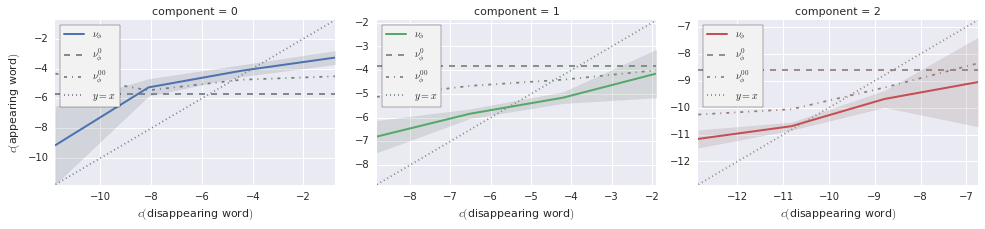

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1022 (cluster-unique) substitutions, but the PCA is in fact computed on 420 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.